## Madina Hayva Putri - 5220411187
## Pemrosesan Teks Kelas B

## Tema: Perbandingan Aplikasi Edit Video di PlayStore

### Scraping Data dari 4 aplikasi

In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np

### 1. Capcut

In [3]:
result, continuation_token = reviews(
    'com.lemon.lvoverseas',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=5000,
    filter_score_with=None
)
data1 = pd.DataFrame(np.array(result), columns=['review'])
data1 = data1.join(pd.DataFrame(data1.pop('review').tolist()))
data1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e2ee9f8b-1c69-4c73-ab55-d4ab2a65710b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Skrng sedikit² berbayar, nggak seperti dulu. S...",1,653,16.0.0,2026-01-02 12:47:16,None,NaT,16.0.0
1,feb22858-94d6-4293-9089-949485efe7d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bintang 1 cukup. beli paket standart baru 1 ha...,1,40,16.2.0,2026-01-01 16:23:22,None,NaT,16.2.0
2,96a8bfda-cc4a-46ec-a108-533f490abaa3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus bet aplikasinya, apalagi buat ngedit fot...",5,8532,16.0.0,2025-12-16 06:46:13,None,NaT,16.0.0
3,575945e2-6ea7-4a0a-901a-464acea0ac5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Di luar fitur editnya yang bagus dan mudah dig...,5,186,16.0.0,2026-01-02 06:01:24,None,NaT,16.0.0
4,d23420db-dc8a-40e7-b0f5-ce1e6a762297,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,capcut semakin update+ penambahan fitur semaki...,2,331,16.0.0,2025-12-25 14:45:58,Thanks for your feedback. App crashes/closures...,2025-12-26 07:18:11,16.0.0


In [4]:
data1_baru = data1[['userName', 'content', 'score']]
data1 = data1_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data1.head()

,Nama Akun,ulasan,rating
0,Pengguna Google,"Skrng sedikit² berbayar, nggak seperti dulu. S...",1
1,Pengguna Google,bintang 1 cukup. beli paket standart baru 1 ha...,1
2,Pengguna Google,"Bagus bet aplikasinya, apalagi buat ngedit fot...",5
3,Pengguna Google,Di luar fitur editnya yang bagus dan mudah dig...,5
4,Pengguna Google,capcut semakin update+ penambahan fitur semaki...,2


In [5]:
data1['rating'].value_counts()

,count
rating,
1,2661
5,712
2,655
3,550
4,422


### preprocessing data

In [6]:
!pip install nltk
!pip install Sastrawi
!pip install emoji

In [7]:
import re
import string
import nltk
import emoji
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df1 = pd.DataFrame(data1)

In [9]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [10]:
stop_words = set(stopwords.words('indonesian'))

# stopwords tambahan
custom_stopwords = [
    # sapaan & basa-basi
    'halo', 'hai', 'hi', 'hello', 'gan', 'bro', 'sis', 'min', 'admin', 'neng',

    # kata umum tidak bermakna sentimen
    'tolong', 'mohon', 'terima', 'kasih', 'thanks', 'makasih',
    'dong', 'nih', 'sih', 'deh', 'aja', 'kok', 'lah', 'yah', 'ya',
    'terimakasih', 'kali', 'ko', 'cuma', 'cuman', 'semoga', 'silahkan',
    'moga', 'pokok', 'hehee', 'hehe', 'wkwk', 'pliss', 'makasii', 'kadang',
    'kdg', 'assalamualaikum', 'nyaa', 'pokoknya', 'assalamu', 'poko', 'dehh',
    'gapapa', 'plss', 'ajaa', 'apa', 'trimakasih', 'sihh', 'bismillah', 'plis',
    'kesini', 'poko', 'gimana', 'malah', 'ayo', 'guys', 'fikss', 'pokonya',
    'apaa',

    # konteks aplikasi
    'aplikasi', 'app', 'apk', 'capcut', 'inshot', 'editan', 'editnya', 'edit',
    'video', 'aplikasinya', 'aplikasih', 'vidio', 'editing', 'editor',
    'videonya', 'videoin', 'apps', 'apknya', 'insot', 'inshoot',

    # kata umum berfrekuensi tinggi
    'yang', 'dan', 'atau', 'untuk', 'dengan', 'pada', 'dari',
    'ini', 'itu', 'jadi', 'kalo', 'kalau', 'paling', 'lagi', 'kayak',
    'terus', 'trus', 'drpd', 'kaya', 'gini', 'gin', 'meng', 'gitu', 'doang'
]

stop_words.update(custom_stopwords)

In [11]:
slang_dict = {
    'gk': 'tidak',
    'ga': 'tidak',
    'nggak': 'tidak',
    'ngga' : 'tidak',
    'nggk' : 'tidak',
    'ngak' : 'tidak',
    'tdk' : 'tidak',
    'bgt': 'banget',
    'dr': 'dari',
    'krn': 'karena',
    'karna': 'karena',
    'tp': 'tapi',
    'aja': 'saja',
    'eror': 'error',
    'erorr': 'error',
    'erorrs': 'error',
    'nontonya': 'nonton',
    'nntn' : 'nonton',
    'loginya': 'login',
    'ngedit' : 'edit',
    'udah' : 'sudah',
    'sudh' : 'sudah',
    'kalo' : 'kalau',
    'baguss' : 'bagus',
    'bagusss' : 'bagus',
    'bagu' : 'bagus',
    'bagussss': 'bagus',
    'ngebug' : 'bug',
    'ngelag' : 'lag',
    'skrg' : 'sekarang',
    'skarang' : 'sekarang',
    'skrng' :'sekarang',
    'gabisa' : 'tidak bisa',
    'bikin' : 'membuat',
    'pake' : 'pakai',
    'kodek' : 'codec',
    'gajelas' : 'tidak jelas',
    'kasi' : 'kasih',
    'beaar' : 'besar',
    'pdhl' : 'padahal',
    'ngonten' : 'konten',
    'donlot' : 'download',
    'fidio' : 'video',
    'capcup' : 'capcut',
    'bgtt' :'banget',
    'ngeditnya' : 'edit',
    'kalok' : 'kalo',
    'kagak': 'tidak',
    'senilai' : 'nilai',
    'terllu' : 'terlalu',
    'dikurangi' : 'kurang',
    'gaje' : 'tidak jelas',
    'kurangin':'kurang',
    'ngelek' : 'lag',
    'ngeleg' : 'lag',
    'gerakan' : 'gerak',
    'gerakin' : 'gerak',
    'fade' : 'fase',
    'kopi' : 'copy',
    'instal' : 'install',
    'sampe' : 'sampai',
    'pakek' : 'pakai',
    'make' : 'pakai',
    'makek' : 'pakai',
    'bugnya' : 'bug',
    'gede' : 'besar',
    'bisaa' : 'bisa',
    'capcutnya' : 'capcut',
    'inshotnya' : 'inshot',
    'hilangin' : 'hilang',
    'hilangkan' : 'hilang',
    'loadingnya' : 'loading',
    'gada' : 'tidak ada',
    'gaada' : 'tidak ada',
    'gaadaa' : 'tidak ada',
    'gaadaaa' : 'tidak ada',
    'donlowad' : 'download',
    'mengupdate' : 'update',
    'bngt' : 'banget',
    'fiturnya' : 'fitur',
    'bnget' : 'banget',
    'maap' : 'maap',
    'hrus' : 'harus',
    'mesti' : 'pasti',
    'bnyk' : 'banyak',
    'prlu' : 'perlu',
    'sikit' : 'dikit',
    'mnjawab':'menjawab',
    'menjawab' : 'jawab',
    'mnit' : 'menit',
    'mlah' : 'malah',
    'nemu' : 'temu',
    'pnghilanh' : 'penghilang',
    'penghilang' : 'hilang',
    'muas' : 'muak',
    'sring' : 'sering',
    'nyesel' : 'sesal',
    'kesel' : 'kesal',
    'bajakan' : 'bajak',
    'ngasih' : 'kasih',
    'tpii' : 'tapi',
    'nempelin' : 'tempel',
    'ngeblur' : 'blur',
    'burem':'buram',
    'tambahin':'tambah',
    'nambah':'tambah',
    'seneng':'senang',
    'tetep' : 'tetap',
    'bangett':'banget',
    'mulu':'terus',
    'ngerti':'erti',
    'cupcat':'capcut'
}

In [12]:
def text_preprocessing(text, stop_words, slang_dict, stemmer):
    # 1. Casefolding
    text = text.lower()

    # 2. Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # 3. Hapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')

    # 4. Hapus angka, tanda baca, simbol, dan karakter non-huruf
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Hapus emoji
    text = emoji.demojize(text)

    # 6. Tokenisasi
    tokens = word_tokenize(text)

    # 7. Normalisasi huruf berulang (asikkk → asik)
    tokens = [re.sub(r'(.)\1{2,}', r'\1\1', word) for word in tokens]

    # 8. Normalisasi kata gaul / typo
    tokens = [slang_dict.get(word, word) for word in tokens]

    # 9. Hapus stopword
    tokens = [word for word in tokens if word not in stop_words]

    # 10. Hapus kata dengan panjang ≤ 3 huruf
    tokens = [word for word in tokens if len(word) > 3]

    # 11. Stemming (Bahasa Indonesia)
    protected_words = {'bagus', 'lemot', 'alasan', 'nilai', 'install', 'kurang', 'sekarang', 'gerak', 'sampai', 'bajak'}
    tokens = [w if w in protected_words else stemmer.stem(w) for w in tokens]

    # 12. Kembalikan ke bentuk string
    return ' '.join(tokens)

In [13]:
df1["Clean_Comment"] = df1["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df1.head()

,Nama Akun,ulasan,rating,Clean_Comment
0,Pengguna Google,"Skrng sedikit² berbayar, nggak seperti dulu. S...",1,bayar favorit mudah guna pilih maaf layan grat...
1,Pengguna Google,bintang 1 cukup. beli paket standart baru 1 ha...,1,bintang beli paket standart dipake hapus data ...
2,Pengguna Google,"Bagus bet aplikasinya, apalagi buat ngedit fot...",5,bagus foto ekspor kdng iklan iklan ulang iklan...
3,Pengguna Google,Di luar fitur editnya yang bagus dan mudah dig...,5,fitur bagus mudah smart chat customer servicen...
4,Pengguna Google,capcut semakin update+ penambahan fitur semaki...,2,update tambah fitur tidak jelas lemot suka mac...


In [14]:
#cek data kosong
df1.isnull().sum()

,0
Nama Akun,0
ulasan,0
rating,0
Clean_Comment,0


In [15]:
#cek data yang sama
df1.duplicated().any()

np.False_

### pelabelan data

In [16]:
def sentiment_from_rating(r):
    if r >= 4:
        return 'Positive'
    elif r == 3:
        return 'Neutral'
    else:
        return 'Negative'

df1['sentiment_rating'] = df1['rating'].apply(sentiment_from_rating)

In [17]:
positive_words = [
    'bagus','mantap','keren','puas','suka','cepat','mudah',
    'oke','recommended','terbaik','manfaat', 'rekomendasi',
    'lancar', 'mudah', 'enak', 'paham', 'gampang', 'mampu',
    'bantu', 'bantu', 'best', 'cocok', 'erti', 'bisa', 'senang'
]

negative_words = [
    'jelek','buruk','lemot','error','crash','parah','kecewa',
    'lambat','gagal','sampah','ribet','tolol','bangsat', 'ngelag',
    'ngebug', 'lag', 'bug', 'payah', 'gagal', 'rugi', 'busuk',
    'loading', 'stuck', 'sebal', 'susah', 'sebel', 'bingung',
    'block', 'limit', 'premium', 'bayar', 'langganan', 'langgan',
    'berat', 'sulit', 'sesal', 'kesal'
]

In [18]:
def sentiment_lexicon(text):
    pos, neg = 0, 0
    for word in text.split():
        if word in positive_words:
            pos += 1
        elif word in negative_words:
            neg += 1

    if pos > neg:
        return 'Positive'
    elif neg > pos:
        return 'Negative'
    else:
        return 'Neutral'
df1['sentiment_lexicon'] = df1['Clean_Comment'].apply(sentiment_lexicon)

In [19]:
print("Jumlah data awal :", len(df1))

# Validasi: rating == lexicon
df1_valid = df1[df1['sentiment_rating'] == df1['sentiment_lexicon']].copy()
df1_invalid = df1[df1['sentiment_rating'] != df1['sentiment_lexicon']].copy()
print("Jumlah data setelah validasi :", len(df1_valid))
print("Jumlah data tidak valid (dihapus) :", len(df1_invalid))

Jumlah data awal : 5000
Jumlah data setelah validasi : 2557
Jumlah data tidak valid (dihapus) : 2443


In [20]:
df1_valid['app_name'] = 'CapCut'

## Distribusi Data

In [21]:
rating_counts = df1['sentiment_rating'].value_counts()
lexicon_counts = df1['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

comparison_df = comparison_df.reindex(['Positive', 'Neutral', 'Negative'])

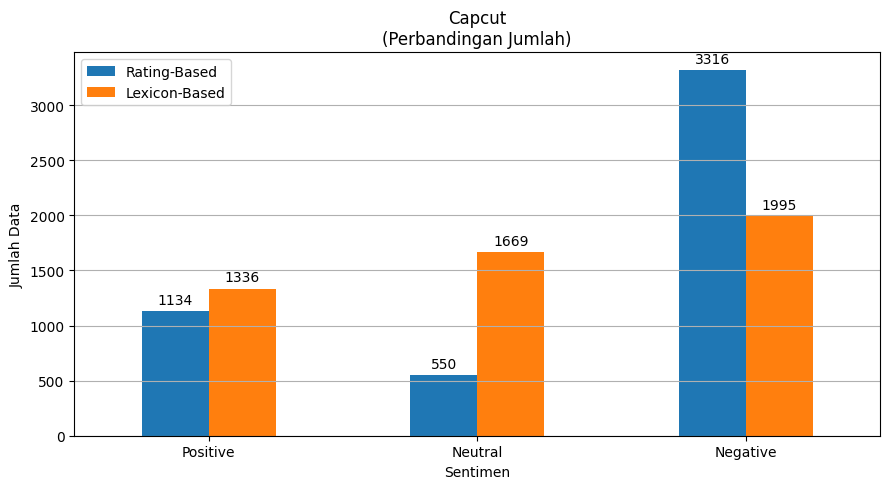

In [22]:
ax = comparison_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('Capcut\n(Perbandingan Jumlah)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

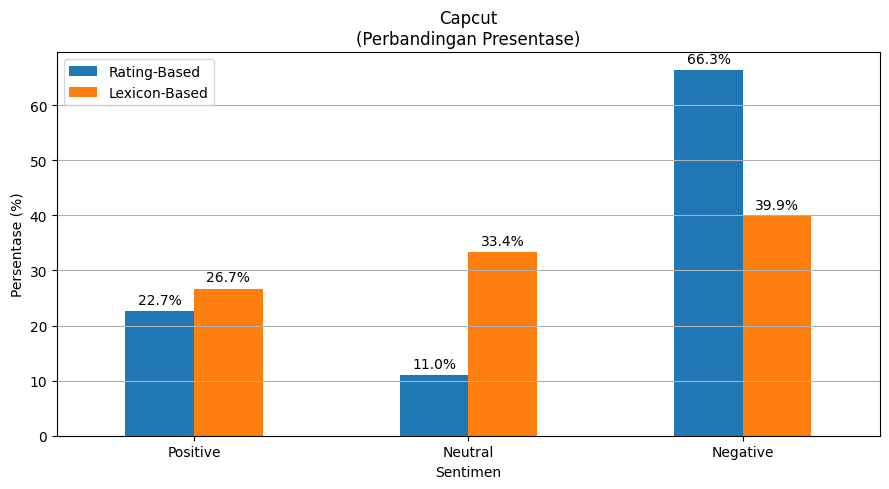

In [23]:
percentage_df = comparison_df.div(comparison_df.sum(axis=0), axis=1) * 100

ax = percentage_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('Capcut\n(Perbandingan Presentase)')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [24]:
df1.head()

,Nama Akun,ulasan,rating,Clean_Comment,sentiment_rating,sentiment_lexicon
0,Pengguna Google,"Skrng sedikit² berbayar, nggak seperti dulu. S...",1,bayar favorit mudah guna pilih maaf layan grat...,Negative,Positive
1,Pengguna Google,bintang 1 cukup. beli paket standart baru 1 ha...,1,bintang beli paket standart dipake hapus data ...,Negative,Negative
2,Pengguna Google,"Bagus bet aplikasinya, apalagi buat ngedit fot...",5,bagus foto ekspor kdng iklan iklan ulang iklan...,Positive,Positive
3,Pengguna Google,Di luar fitur editnya yang bagus dan mudah dig...,5,fitur bagus mudah smart chat customer servicen...,Positive,Positive
4,Pengguna Google,capcut semakin update+ penambahan fitur semaki...,2,update tambah fitur tidak jelas lemot suka mac...,Negative,Negative


In [25]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_capcut.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.cm as cm
import seaborn as sns

In [27]:
def plot_ngram(df, sentiment, n, text_col,
               app_name="CapCut", top_n=10):

    texts = df[df["sentiment_lexicon"] == sentiment][text_col]
    if texts.empty:
        print(f"Tidak ada data untuk {sentiment}")
        return

    vec = CountVectorizer(ngram_range=(n, n), min_df=1)
    X = vec.fit_transform(texts)

    df_ngram = (
        pd.DataFrame({
            "Ngram": vec.get_feature_names_out(),
            "Frekuensi": X.sum(axis=0).A1
        })
        .sort_values("Frekuensi", ascending=False)
        .head(top_n)
    )

    palette = {
        "Positive": "Greens_r",
        "Neutral": "Blues_r",
        "Negative": "Reds_r"
    }

    ax = sns.barplot(
        data=df_ngram,
        x="Frekuensi", y="Ngram",
        hue="Ngram",
        palette=palette.get(sentiment, "viridis"),
        legend=False
    )

    ngram_name = "Bi-gram" if n == 2 else "Tri-gram"
    ax.set_title(f"{app_name}\n{ngram_name} Sentimen {sentiment}")
    ax.set_xlabel("Frekuensi")
    ax.set_ylabel("")

    for p in ax.patches:
        ax.text(
            p.get_width() + 0.3,
            p.get_y() + p.get_height()/2,
            int(p.get_width()),
            va="center",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

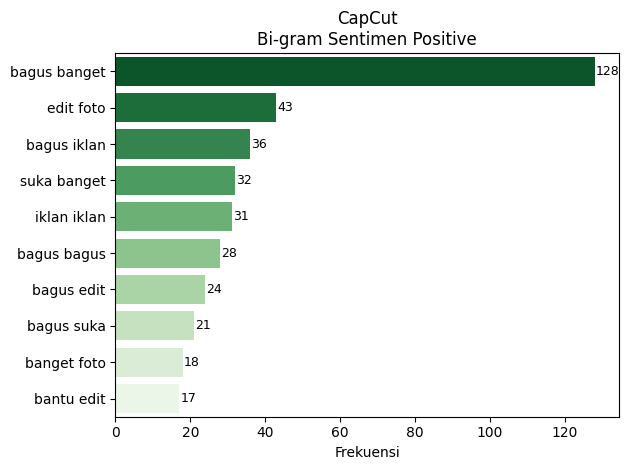

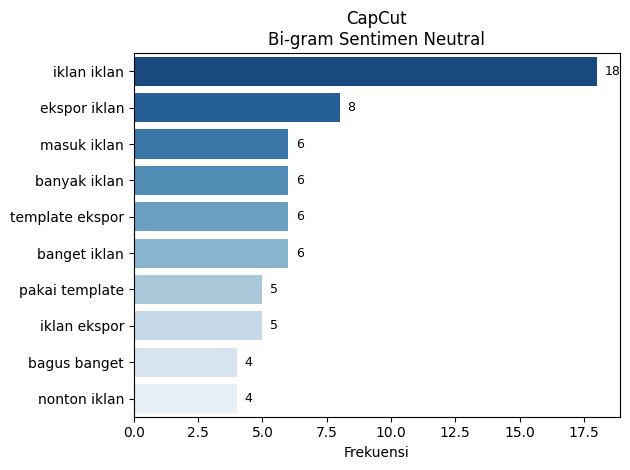

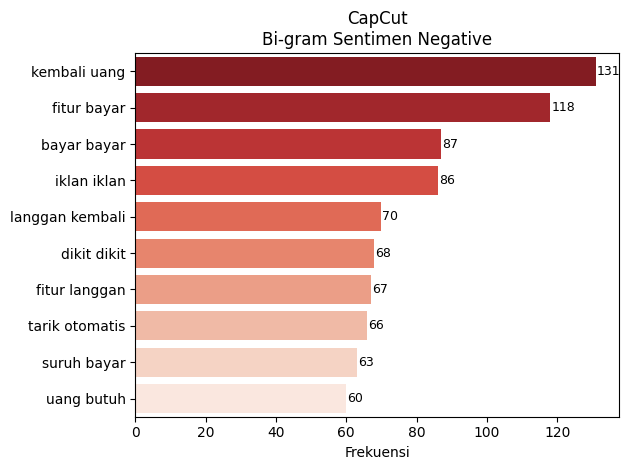

In [28]:
# Bi-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df1_valid,
        sentiment=sent,
        text_col='Clean_Comment',
        n=2,
        top_n=10,
        app_name="CapCut"
    )

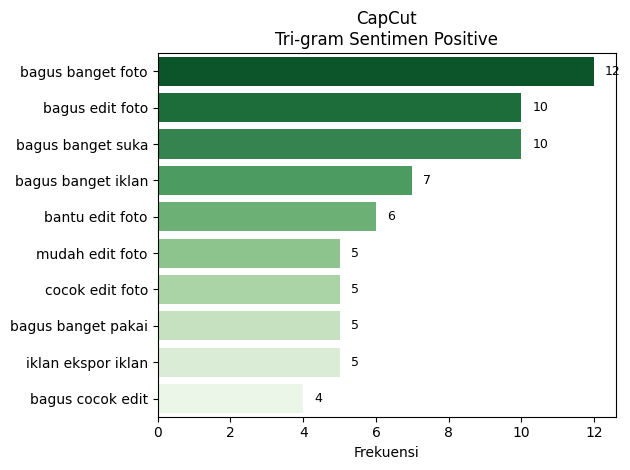

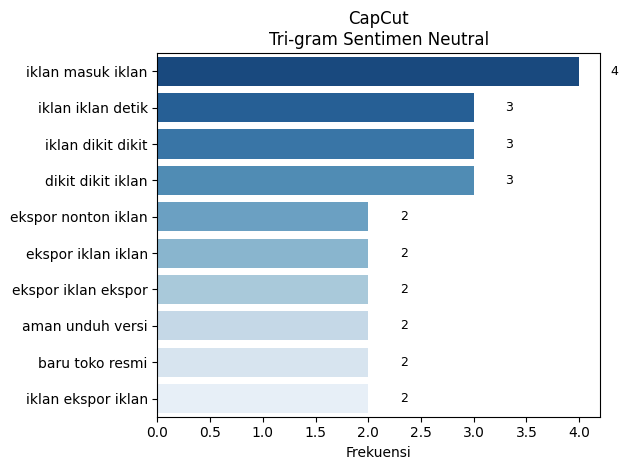

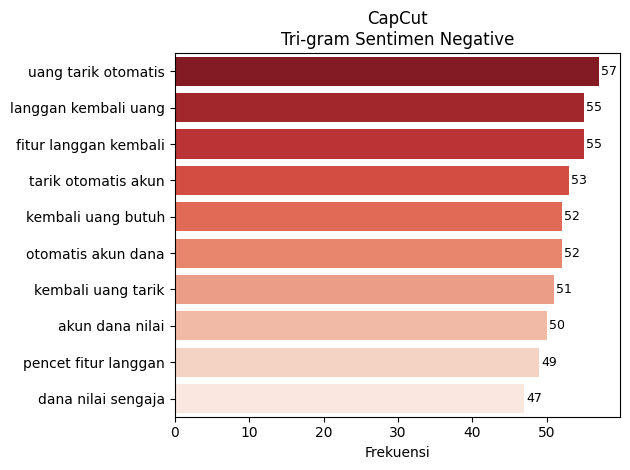

In [29]:
# Tri-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df1_valid,
        sentiment=sent,
        text_col='Clean_Comment',
        n=3,
        top_n=10,
        app_name="CapCut"
    )

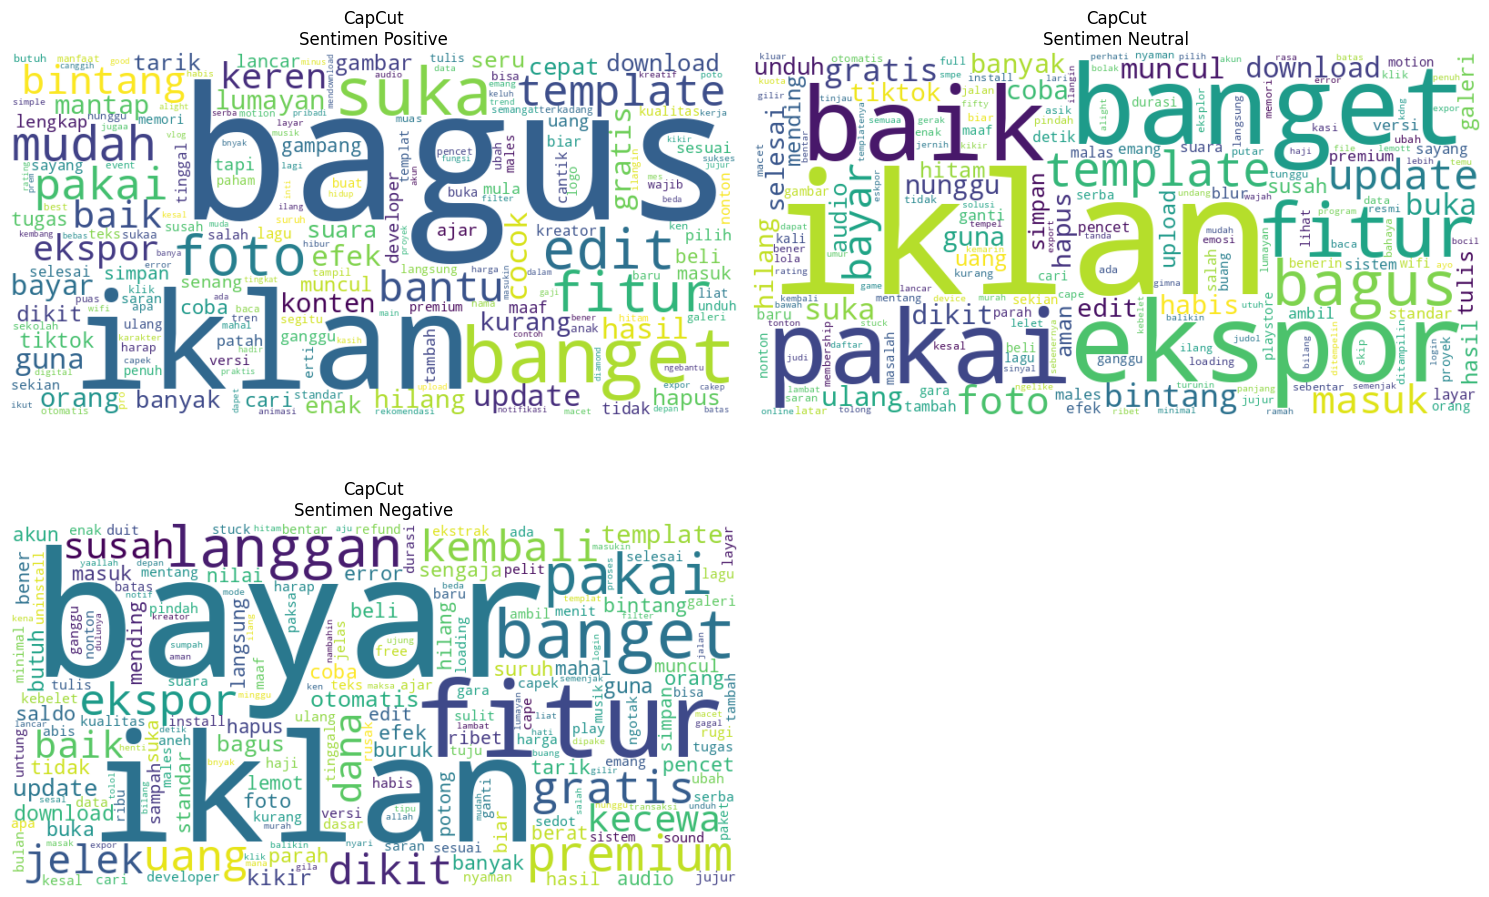

In [30]:
sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    text = ' '.join(df1_valid[df1_valid['sentiment_lexicon'] == sent]['Clean_Comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400,
        collocations=False
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"CapCut\nSentimen {sent}")

    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

In [31]:
df_nila = df1_valid[
    df1_valid['Clean_Comment'].str.contains(r'\bneng\b', case=False, na=False)
]

df_nila[['ulasan', 'Clean_Comment']].head(10)

,ulasan,Clean_Comment


## 2. INSHOT

In [32]:
result, continuation_token = reviews(
    'com.camerasideas.instashot',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=5000,
    filter_score_with=None
)
data2 = pd.DataFrame(np.array(result), columns=['review'])
data2 = data2.join(pd.DataFrame(data2.pop('review').tolist()))
data2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b0c8ae55-c240-443d-86f3-4cd206a26b69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Lagi eror kayaknya aplikasi ini soalnya tiba2 ...,3,1,2.175.1517,2025-12-28 18:11:44,Halo. Maaf atas masalah ini. Kami ingin menget...,2025-12-29 05:45:15,2.175.1517
1,52dd2c71-1d90-4421-8e4a-8a3f78929a00,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"semuanya bagus, tapi masalahnya aplikasinya su...",5,40,2.175.1517,2025-12-23 05:26:47,None,NaT,2.175.1517
2,a7b72772-42e7-4864-8553-5349d2eebf26,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ini apli udah cukup bagus,tapi tolong tambahka...",5,4,2.183.1521,2025-12-27 07:46:43,None,NaT,2.183.1521
3,02cd7f93-ef97-469c-85d4-120835090374,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"suka banget ngga bikin hp jadi lalot, cocok ba...",5,182,2.162.1510,2025-10-27 03:49:11,None,NaT,2.162.1510
4,d18bfa39-8aa6-4346-8687-9b1c141b88fd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi edit yang sangat gampang di gunakan k...,5,0,2.175.1517,2025-12-30 09:53:24,None,NaT,2.175.1517


In [33]:
data2_baru = data2[['userName', 'content', 'score']]
data2 = data2_baru.rename(columns={'userName':'Nama Akun', 'content':'ulasan', 'score':'rating'})
data2.head()

,Nama Akun,ulasan,rating
0,Pengguna Google,Lagi eror kayaknya aplikasi ini soalnya tiba2 ...,3
1,Pengguna Google,"semuanya bagus, tapi masalahnya aplikasinya su...",5
2,Pengguna Google,"Ini apli udah cukup bagus,tapi tolong tambahka...",5
3,Pengguna Google,"suka banget ngga bikin hp jadi lalot, cocok ba...",5
4,Pengguna Google,aplikasi edit yang sangat gampang di gunakan k...,5


In [34]:
data2['rating'].value_counts()

,count
rating,
5,3044
4,792
3,496
1,406
2,262


### preprocessing data

In [35]:
df2 = pd.DataFrame(data2)

In [36]:
df2["clean_comment"] = df2["ulasan"].apply(lambda x: text_preprocessing(x, stop_words, slang_dict, stemmer))
df2.head()

,Nama Akun,ulasan,rating,clean_comment
0,Pengguna Google,Lagi eror kayaknya aplikasi ini soalnya tiba2 ...,3,error kayak mati nyala simpan hasil kali ngula...
1,Pengguna Google,"semuanya bagus, tapi masalahnya aplikasinya su...",5,bagus notifikasi mogok alasan sendiri coba hap...
2,Pengguna Google,"Ini apli udah cukup bagus,tapi tolong tambahka...",5,apli bagus tambah fitur buat filter efek edit ...
3,Pengguna Google,"suka banget ngga bikin hp jadi lalot, cocok ba...",5,suka banget lalot cocok banget tugas kuliah si...
4,Pengguna Google,aplikasi edit yang sangat gampang di gunakan k...,5,gampang kurang fitur jernih poto gratis bayar ...


In [37]:
#cek data kosong
df2.isnull().sum()

,0
Nama Akun,0
ulasan,0
rating,0
clean_comment,0


In [38]:
#cek data yang sama
df2.duplicated().any()

np.True_

In [39]:
# hapus data duplikat
df2.drop_duplicates(inplace=True)

In [40]:
# cek lagi, apakah masih ada data duplikat?
df2.duplicated().any()

np.False_

### pelabelan data

In [41]:
df2['sentiment_rating'] = df2['rating'].apply(sentiment_from_rating)

In [42]:
df2['sentiment_lexicon'] = df2['clean_comment'].apply(sentiment_lexicon)

In [43]:
print("Jumlah data awal :", len(df2))

# Validasi: rating == lexicon
df2_valid = df2[df2['sentiment_rating'] == df2['sentiment_lexicon']].copy()
df2_invalid = df2[df2['sentiment_rating'] != df2['sentiment_lexicon']].copy()
print("Jumlah data setelah validasi :", len(df2_valid))
print("Jumlah data tidak valid (dihapus) :", len(df2_invalid))

Jumlah data awal : 4999
Jumlah data setelah validasi : 3297
Jumlah data tidak valid (dihapus) : 1702


In [44]:
df2_valid['app_name'] = 'Inshot'

## Distribusi Data

In [45]:
rating_counts = df2['sentiment_rating'].value_counts()
lexicon_counts = df2['sentiment_lexicon'].value_counts()

comparison_df = pd.DataFrame({
    'Rating-Based': rating_counts,
    'Lexicon-Based': lexicon_counts
}).fillna(0)

comparison_df = comparison_df.reindex(['Positive', 'Neutral', 'Negative'])

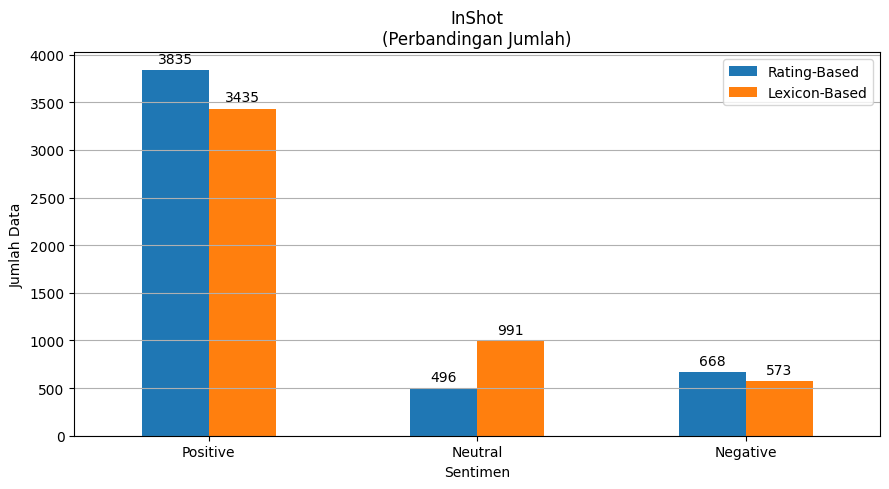

In [46]:
ax = comparison_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('InShot\n(Perbandingan Jumlah)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

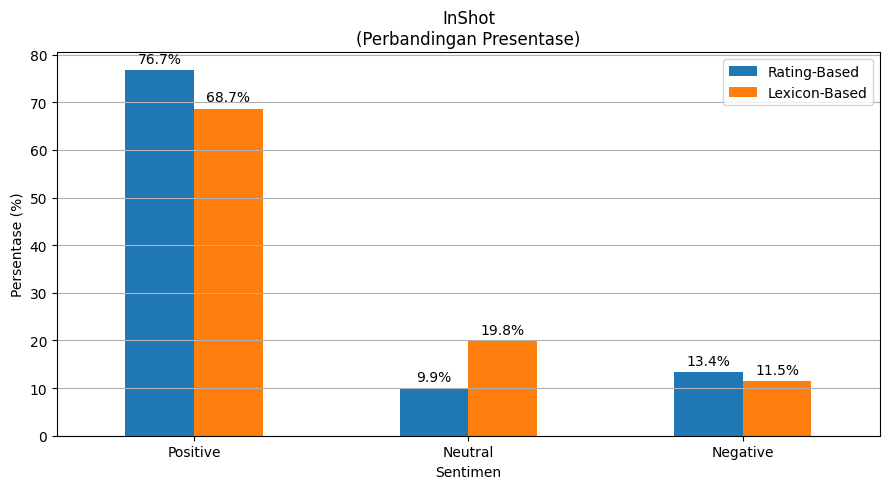

In [47]:
percentage_df = comparison_df.div(comparison_df.sum(axis=0), axis=1) * 100

ax = percentage_df.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title('InShot\n(Perbandingan Presentase)')
plt.xlabel('Sentimen')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [48]:
df2.head()

,Nama Akun,ulasan,rating,clean_comment,sentiment_rating,sentiment_lexicon
0,Pengguna Google,Lagi eror kayaknya aplikasi ini soalnya tiba2 ...,3,error kayak mati nyala simpan hasil kali ngula...,Neutral,Negative
1,Pengguna Google,"semuanya bagus, tapi masalahnya aplikasinya su...",5,bagus notifikasi mogok alasan sendiri coba hap...,Positive,Neutral
2,Pengguna Google,"Ini apli udah cukup bagus,tapi tolong tambahka...",5,apli bagus tambah fitur buat filter efek edit ...,Positive,Positive
3,Pengguna Google,"suka banget ngga bikin hp jadi lalot, cocok ba...",5,suka banget lalot cocok banget tugas kuliah si...,Positive,Positive
4,Pengguna Google,aplikasi edit yang sangat gampang di gunakan k...,5,gampang kurang fitur jernih poto gratis bayar ...,Positive,Neutral


In [49]:
# Simpan hasil preprocessing
# df.to_csv('hasilAkhir_inshotr.csv', index=False, encoding="utf-8-sig")

### Visualisasi N-Gram dan WordCloud

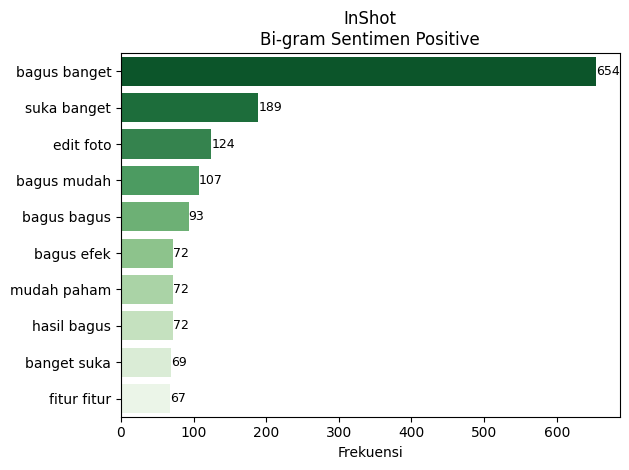

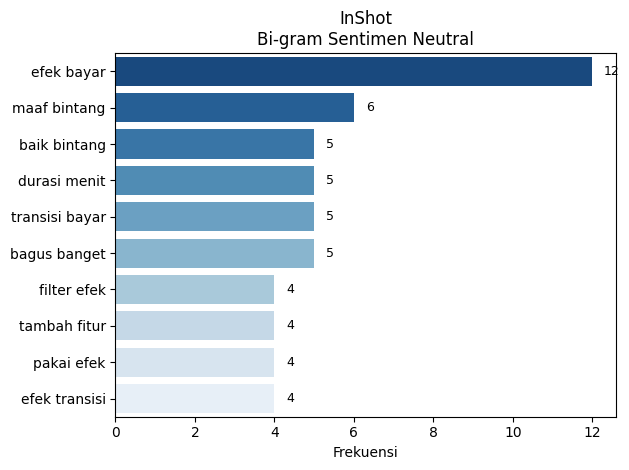

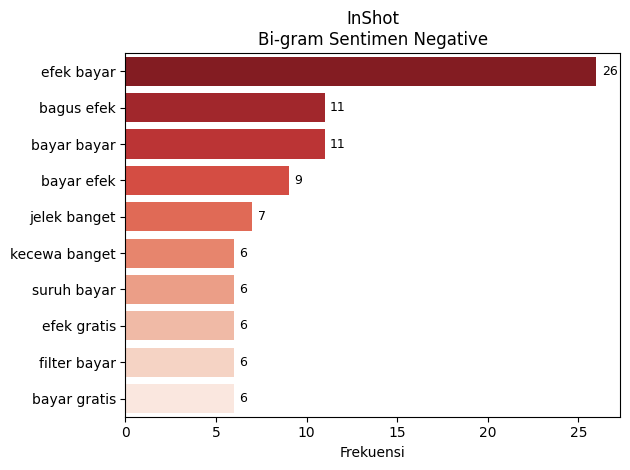

In [50]:
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df2_valid,
        sentiment=sent,
        text_col='clean_comment',
        n=2,
        top_n=10,
        app_name="InShot"
    )

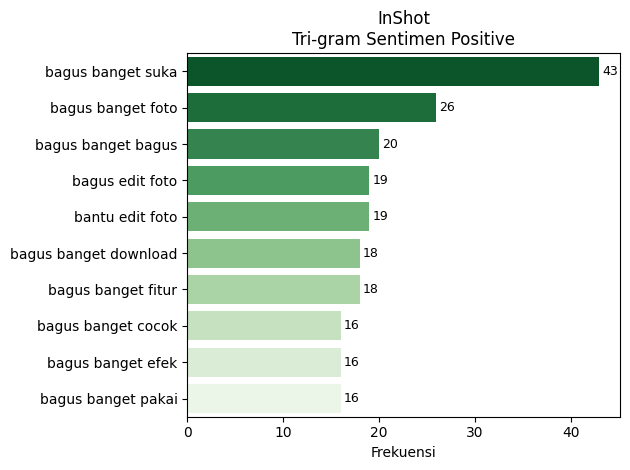

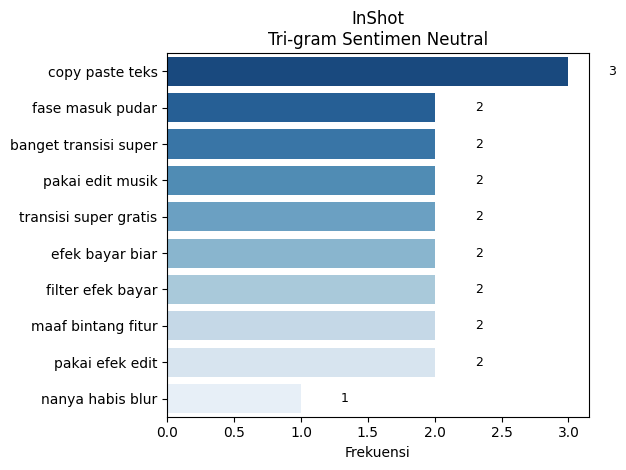

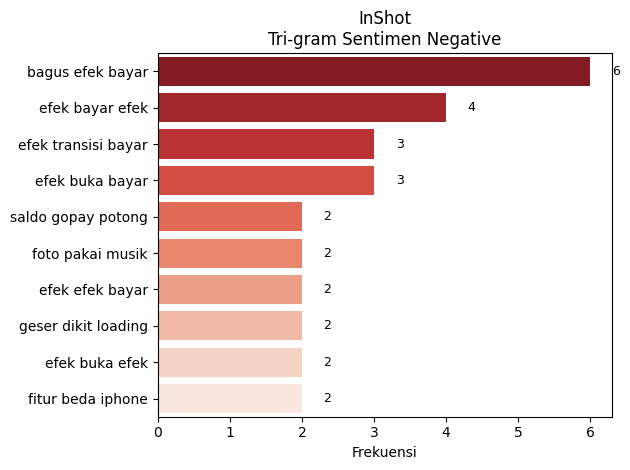

In [51]:
# Tri-gram
for sent in ['Positive', 'Neutral', 'Negative']:
    plot_ngram(
        df=df2_valid,
        sentiment=sent,
        text_col='clean_comment',
        n=3,
        top_n=10,
        app_name="InShot"
    )

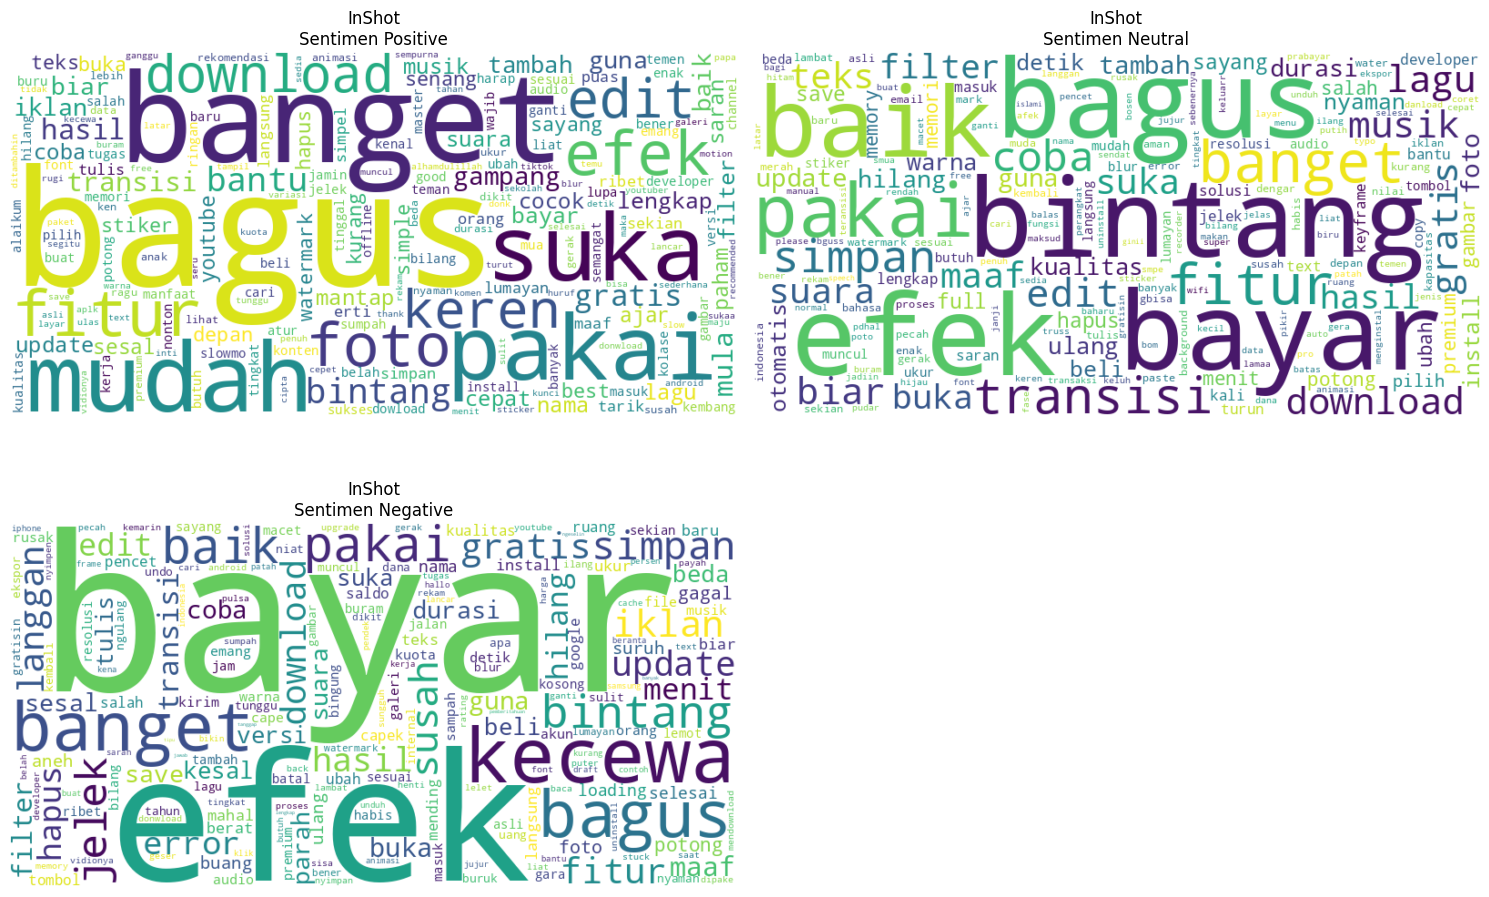

In [52]:
sentiments = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(15, 10))

for i, sent in enumerate(sentiments, 1):
    text = ' '.join(df2_valid[df2_valid['sentiment_rating'] == sent]['clean_comment'])

    wordcloud = WordCloud(
        background_color="white",
        width=800,
        height=400,
        collocations=False
    ).generate(text)

    plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"InShot\nSentimen {sent}")

    wordcloud.to_file(f"wordcloud_{sent.lower()}.png")

plt.tight_layout()
plt.show()

## Perbandingan Total Data Setelah Validasi

In [53]:
df_all_valid = pd.concat([
    df1_valid,
    df2_valid
])

In [54]:
df_plot = (
    df_all_valid['sentiment_rating']
    .groupby(df_all_valid['app_name'])
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

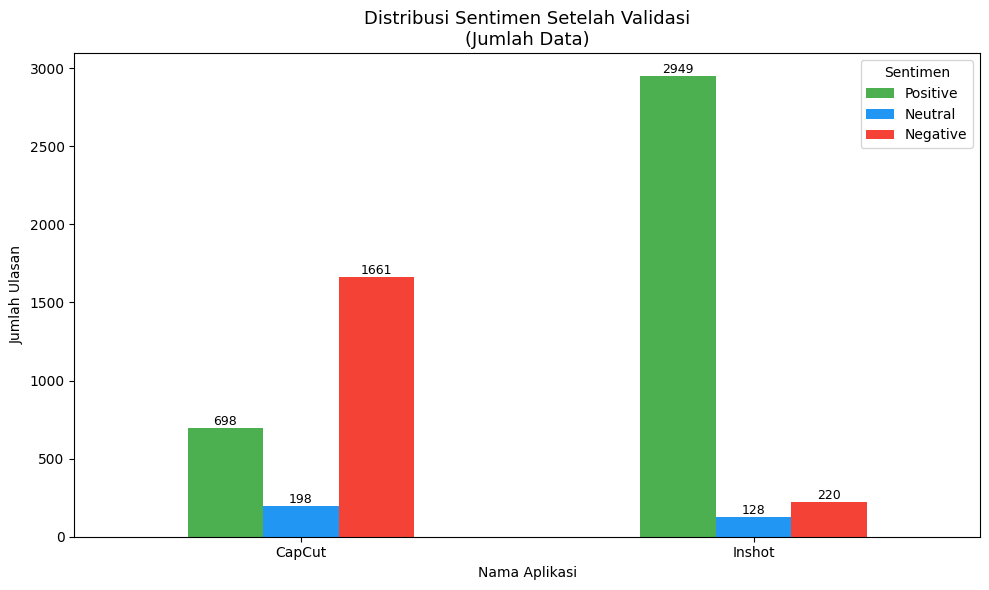

In [55]:
df_plot.set_index('app_name')[['Positive','Neutral','Negative']].plot(
    kind='bar',
    figsize=(10,6),
    color=['#4CAF50', '#2196F3', '#F44336']
)

plt.title(
    "Distribusi Sentimen Setelah Validasi\n(Jumlah Data)",
    fontsize=13
)
plt.xlabel("Nama Aplikasi")
plt.ylabel("Jumlah Ulasan")
plt.legend(title="Sentimen")

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()